# Imports e leitura do csv

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

import io
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
!pip install scikit-plot
import scikitplot as skplt

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

In [2]:
#!pip install parameter-sherpa
from sklearn.model_selection import cross_val_score
import time
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

%matplotlib inline

# Importing libraries used for reading csv from cloud
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Cloud authentication and getting file
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1u-Dp_ud44EW814B3WZgWpjt3W-jVdRpc"})
downloaded.GetContentFile('TRNcod.csv')

In [3]:
# Reading csv, dropping INDEX column and peeking at data
df = pd.read_csv('TRNcod.csv')

df = df.drop(columns = ['INDEX'])
print(df.shape)
df.head()

(389196, 245)


,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,1,1,1,0,0,0,0,0.135098,1,0.222222,...,0,0,1,1,0,1,1,1,0,1
1,1,0,1,0,0,1,0,0.273504,1,0.111111,...,0,1,0,1,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0.281910,0,1.000000,...,1,1,0,0,0,0,1,0,1,0
3,1,1,1,0,0,0,0,0.225741,0,0.111111,...,1,1,0,1,1,0,1,0,1,0
4,1,1,0,0,0,1,0,0.480403,0,0.111111,...,1,1,1,0,0,1,0,1,1,0


# Mixer de dados

In [4]:
#separando os dados da classe IND_BOM_1_1
dfClass1 = df[df['IND_BOM_1_1']==1]
print(dfClass1.shape)
dfClass1.head()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


(255098, 245)


,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
1,1,0,1,0,0,1,0,0.273504,1,0.111111,...,0,1,0,1,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0.281910,0,1.000000,...,1,1,0,0,0,0,1,0,1,0
3,1,1,1,0,0,0,0,0.225741,0,0.111111,...,1,1,0,1,1,0,1,0,1,0
4,1,1,0,0,0,1,0,0.480403,0,0.111111,...,1,1,1,0,0,1,0,1,1,0
5,0,1,1,0,0,0,1,0.219323,0,0.111111,...,0,1,1,0,1,0,0,1,1,0


In [5]:
#separando os dados da classe IND_BOM_1_2
dfClass2 = df[df['IND_BOM_1_2']==1]
print(dfClass2.shape)
dfClass2.head()

(134098, 245)


,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,1,1,1,0,0,0,0,0.135098,1,0.222222,...,0,0,1,1,0,1,1,1,0,1
10,1,0,1,1,0,0,0,0.654703,0,0.111111,...,0,1,0,1,0,0,0,0,0,1
11,1,1,1,0,0,0,0,0.097444,1,0.111111,...,0,1,0,1,0,1,0,1,0,1
12,1,0,1,0,1,0,0,0.398961,0,0.111111,...,1,1,1,0,1,0,0,0,0,1
17,1,1,1,0,0,0,0,0.142254,0,0.111111,...,1,0,0,1,0,1,0,1,0,1


In [6]:
#porcentagem de cada classe do DF
print(dfClass1.shape[0]/df.shape[0])
print(dfClass2.shape[0]/df.shape[0])

0.6554486685371895
0.34455133146281053


In [7]:
#dividindo o dataframe da classe 1 em 50% treinamento e 50% teste
from sklearn.model_selection import train_test_split
class1_train, class1_test = train_test_split(dfClass1, test_size = 0.5, random_state = 2)

print("class1_train shape: {}".format(class1_train.shape))
print("class1_test shape: {}".format(class1_test.shape))

class1_train shape: (127549, 245)
class1_test shape: (127549, 245)


In [8]:
#dividindo o dataframe de teste da classe 1 em 25% teste e 25% validação
class1_test, class1_validation = train_test_split(class1_test, test_size = 0.5, random_state =2)

print("class1_test shape: {}".format(class1_test.shape))
print("class1_validation shape: {}".format(class1_validation.shape))

class1_test shape: (63774, 245)
class1_validation shape: (63775, 245)


In [9]:
#repetindo as divisões para a classe 2
class2_train, class2_test = train_test_split(dfClass2, test_size = 0.5, random_state = 2)

print("class2_train shape: {}".format(class2_train.shape))
print("class2_test shape: {}".format(class2_test.shape))

class2_train shape: (67049, 245)
class2_test shape: (67049, 245)


In [10]:
class2_test, class2_validation = train_test_split(class2_test, test_size = 0.5, random_state = 2)

In [11]:
print(class2_test.shape)
print(class2_validation.shape)

(33524, 245)
(33525, 245)


In [12]:
#aumentando o dataframe de treinamento da classe minoritária para o dobro do seu tamanho utilizando de repetição
while (class2_train.shape[0] < class1_train.shape[0]):
    class2_train = class2_train.append(class2_train)

print(class2_train.shape)

(134098, 245)


In [13]:
#removendo dados excedentes
class2_train = class2_train.head(class1_train.shape[0])
print(class1_train.shape[0])
print(class2_train.shape[0])

127549
127549


In [14]:
#repetindo o processo para o dataframe de validação
while (class2_validation.shape[0] < class1_validation.shape[0]):
    class2_validation = class2_validation.append(class2_validation)

print(class2_validation.shape)

(67050, 245)


In [15]:
class2_validation = class2_validation.head(class1_validation.shape[0])
print(class1_validation.shape[0])
print(class2_validation.shape[0])

63775
63775


In [16]:
validation_X = class2_validation.append(class1_validation).sample(frac=1)
train_X = class2_train.append(class1_train).sample(frac=1)
test_X = class2_test.append(class1_test).sample(frac=1)

In [17]:
print(validation_X.shape[0])
print(train_X.shape[0])
print(test_X.shape[0])

127550
255098
97298


In [18]:
# Transformando IND_BOM_1_1 e IND_BOM_1_2 (que são mutualmente exclusivos em uma unica medida, BOM)
# BOM = 0 means IND_BOM_1_1 = 1
# BOM = 1 means IND_BOM_1_2 = 1

validation_Y = validation_X[["IND_BOM_1_1", "IND_BOM_1_2"]]
validation_X = validation_X.drop(['IND_BOM_1_1'], axis=1)
validation_X = validation_X.drop(['IND_BOM_1_2'], axis=1)
validation_Y['BOM'] = validation_Y["IND_BOM_1_2"]
validation_Y = validation_Y.drop(['IND_BOM_1_1'], axis=1)
validation_Y = validation_Y.drop(['IND_BOM_1_2'], axis=1)

train_Y = train_X[["IND_BOM_1_1", "IND_BOM_1_2"]]
train_X = train_X.drop(['IND_BOM_1_1'], axis=1)
train_X = train_X.drop(['IND_BOM_1_2'], axis=1)
train_Y['BOM'] = train_Y["IND_BOM_1_2"]
train_Y = train_Y.drop(['IND_BOM_1_1'], axis=1)
train_Y = train_Y.drop(['IND_BOM_1_2'], axis=1)

test_Y = test_X[["IND_BOM_1_1", "IND_BOM_1_2"]]
test_X = test_X.drop(['IND_BOM_1_1'], axis=1)
test_X = test_X.drop(['IND_BOM_1_2'], axis=1)
test_Y['BOM'] = test_Y["IND_BOM_1_2"]
test_Y = test_Y.drop(['IND_BOM_1_1'], axis=1)
test_Y = test_Y.drop(['IND_BOM_1_2'], axis=1)

# exemple:
validation_Y

,BOM
60364,1
258541,1
314749,1
263203,1
217328,0
...,...
45456,0
388296,0
358065,0
326968,1


In [19]:
# Funções para plotting e etc

def extract_final_losses(history):
    """Função para extrair o melhor loss de treino e validação.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    Dicionário contendo o melhor loss de treino e de validação baseado 
    no menor loss de validação.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def plot_training_error_curves(history):
    """Função para plotar as curvas de erro do treinamento da rede neural.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    A função gera o gráfico do treino da rede e retorna None.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='Train')
    ax.plot(val_loss, label='Validation')
    ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
    ax.legend()
    plt.show()

def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

## MODELS

Random Forest basico:

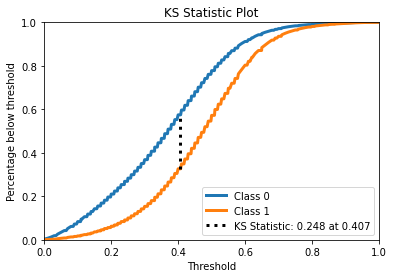


Accuracy:         0.6028
Recall:           0.4277
Precision:        0.6583
F1:               0.5185
AUROC:            0.6690
AUPR:             0.6333


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(train_X, train_Y)
rf_pred_class = rf_clf.predict(validation_X)
rf_pred_scores = rf_clf.predict_proba(validation_X)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(validation_Y, rf_pred_class, rf_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

Random Forest tuning com Sherpa

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

parameters = [sherpa.Discrete('n_estimators', [100, 500]),
              sherpa.Discrete('max_depth', [5, 75]),
              sherpa.Discrete('min_samples_leaf', [2, 10]),
              sherpa.Discrete('min_samples_split', [2, 10]),
              sherpa.Choice('criterion', ['gini', 'entropy']),
              sherpa.Continuous('max_features', [0.1,0.8])]

algorithm = bayesian_optimization.GPyOpt(max_concurrent=1,model_type='GP_MCMC',acquisition_type='EI_MCMC',max_num_trials=20)

Trial  1  with parameters  {'n_estimators': 337, 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 0.5540777286906775}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 337


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.2s remaining:    0.0s


building tree 2 of 337
building tree 3 of 337
building tree 4 of 337
building tree 5 of 337
building tree 6 of 337
building tree 7 of 337
building tree 8 of 337
building tree 9 of 337
building tree 10 of 337
building tree 11 of 337
building tree 12 of 337
building tree 13 of 337
building tree 14 of 337
building tree 15 of 337
building tree 16 of 337
building tree 17 of 337
building tree 18 of 337
building tree 19 of 337
building tree 20 of 337
building tree 21 of 337
building tree 22 of 337
building tree 23 of 337
building tree 24 of 337
building tree 25 of 337
building tree 26 of 337
building tree 27 of 337
building tree 28 of 337
building tree 29 of 337
building tree 30 of 337
building tree 31 of 337
building tree 32 of 337
building tree 33 of 337
building tree 34 of 337
building tree 35 of 337
building tree 36 of 337
building tree 37 of 337
building tree 38 of 337
building tree 39 of 337
building tree 40 of 337
building tree 41 of 337
building tree 42 of 337
building tree 43 of 337


building tree 334 of 337
building tree 335 of 337
building tree 336 of 337
building tree 337 of 337


[Parallel(n_jobs=1)]: Done 337 out of 337 | elapsed: 129.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 337 out of 337 | elapsed:   30.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 337 out of 337 | elapsed:   30.1s finished


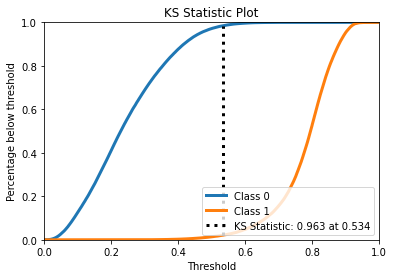

Performance no conjunto de teste:

Accuracy:         0.9788
Recall:           0.9862
Precision:        0.9718
F1:               0.9790
AUROC:            0.9983
AUPR:             0.9985


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 337 out of 337 | elapsed:   14.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 337 out of 337 | elapsed:   14.9s finished


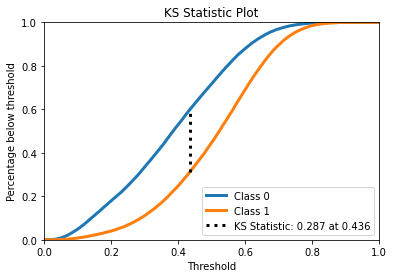

Performance no conjunto de validação:

Accuracy:         0.6357
Recall:           0.5532
Precision:        0.6625
F1:               0.6029
AUROC:            0.6971
AUPR:             0.6737
Trial  2  with parameters  {'n_estimators': 201, 'max_depth': 16, 'min_samples_leaf': 7, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 0.35431006078971783}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed: 38.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   13.6s finished


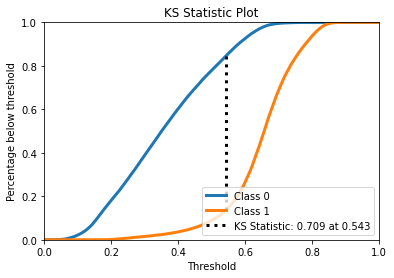

Performance no conjunto de teste:

Accuracy:         0.8450
Recall:           0.9110
Precision:        0.8048
F1:               0.8546
AUROC:            0.9284
AUPR:             0.9299


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    6.7s finished


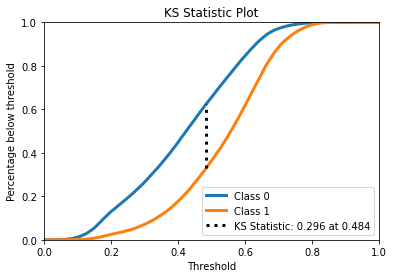

Performance no conjunto de validação:

Accuracy:         0.6456
Recall:           0.6355
Precision:        0.6486
F1:               0.6420
AUROC:            0.7052
AUPR:             0.6867
Trial  3  with parameters  {'n_estimators': 416, 'max_depth': 29, 'min_samples_leaf': 5, 'min_samples_split': 9, 'criterion': 'gini', 'max_features': 0.21414370061763055}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 416


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


building tree 2 of 416
building tree 3 of 416
building tree 4 of 416
building tree 5 of 416
building tree 6 of 416
building tree 7 of 416
building tree 8 of 416
building tree 9 of 416
building tree 10 of 416
building tree 11 of 416
building tree 12 of 416
building tree 13 of 416
building tree 14 of 416
building tree 15 of 416
building tree 16 of 416
building tree 17 of 416
building tree 18 of 416
building tree 19 of 416
building tree 20 of 416
building tree 21 of 416
building tree 22 of 416
building tree 23 of 416
building tree 24 of 416
building tree 25 of 416
building tree 26 of 416
building tree 27 of 416
building tree 28 of 416
building tree 29 of 416
building tree 30 of 416
building tree 31 of 416
building tree 32 of 416
building tree 33 of 416
building tree 34 of 416
building tree 35 of 416
building tree 36 of 416
building tree 37 of 416
building tree 38 of 416
building tree 39 of 416
building tree 40 of 416
building tree 41 of 416
building tree 42 of 416
building tree 43 of 416


building tree 334 of 416
building tree 335 of 416
building tree 336 of 416
building tree 337 of 416
building tree 338 of 416
building tree 339 of 416
building tree 340 of 416
building tree 341 of 416
building tree 342 of 416
building tree 343 of 416
building tree 344 of 416
building tree 345 of 416
building tree 346 of 416
building tree 347 of 416
building tree 348 of 416
building tree 349 of 416
building tree 350 of 416
building tree 351 of 416
building tree 352 of 416
building tree 353 of 416
building tree 354 of 416
building tree 355 of 416
building tree 356 of 416
building tree 357 of 416
building tree 358 of 416
building tree 359 of 416
building tree 360 of 416
building tree 361 of 416
building tree 362 of 416
building tree 363 of 416
building tree 364 of 416
building tree 365 of 416
building tree 366 of 416
building tree 367 of 416
building tree 368 of 416
building tree 369 of 416
building tree 370 of 416
building tree 371 of 416
building tree 372 of 416
building tree 373 of 416


[Parallel(n_jobs=1)]: Done 416 out of 416 | elapsed: 48.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 416 out of 416 | elapsed:   39.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 416 out of 416 | elapsed:   39.3s finished


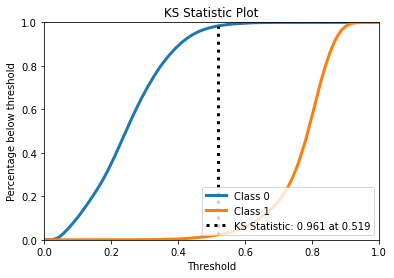

Performance no conjunto de teste:

Accuracy:         0.9796
Recall:           0.9819
Precision:        0.9774
F1:               0.9796
AUROC:            0.9979
AUPR:             0.9981


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 416 out of 416 | elapsed:   19.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 416 out of 416 | elapsed:   19.3s finished


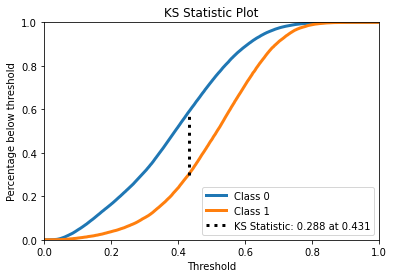

Performance no conjunto de validação:

Accuracy:         0.6345
Recall:           0.5405
Precision:        0.6657
F1:               0.5966
AUROC:            0.6962
AUPR:             0.6709
Trial  4  with parameters  {'n_estimators': 120, 'max_depth': 40, 'min_samples_leaf': 8, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': 0.6775372676312351}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 120


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.7s remaining:    0.0s


building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
building tree 43 of 120


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 55.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   10.8s finished


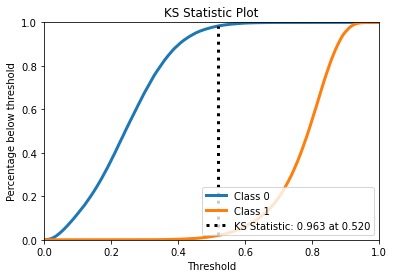

Performance no conjunto de teste:

Accuracy:         0.9808
Recall:           0.9850
Precision:        0.9767
F1:               0.9809
AUROC:            0.9984
AUPR:             0.9984


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    5.3s finished


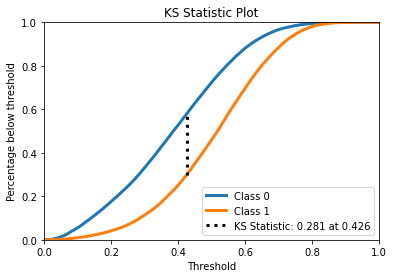

Performance no conjunto de validação:

Accuracy:         0.6323
Recall:           0.5409
Precision:        0.6619
F1:               0.5954
AUROC:            0.6933
AUPR:             0.6702
Trial  5  with parameters  {'n_estimators': 198, 'max_depth': 44, 'min_samples_leaf': 2, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': 0.1762650449184929}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 198


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


building tree 2 of 198
building tree 3 of 198
building tree 4 of 198
building tree 5 of 198
building tree 6 of 198
building tree 7 of 198
building tree 8 of 198
building tree 9 of 198
building tree 10 of 198
building tree 11 of 198
building tree 12 of 198
building tree 13 of 198
building tree 14 of 198
building tree 15 of 198
building tree 16 of 198
building tree 17 of 198
building tree 18 of 198
building tree 19 of 198
building tree 20 of 198
building tree 21 of 198
building tree 22 of 198
building tree 23 of 198
building tree 24 of 198
building tree 25 of 198
building tree 26 of 198
building tree 27 of 198
building tree 28 of 198
building tree 29 of 198
building tree 30 of 198
building tree 31 of 198
building tree 32 of 198
building tree 33 of 198
building tree 34 of 198
building tree 35 of 198
building tree 36 of 198
building tree 37 of 198
building tree 38 of 198
building tree 39 of 198
building tree 40 of 198
building tree 41 of 198
building tree 42 of 198
building tree 43 of 198


[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed: 25.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   20.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   19.7s finished


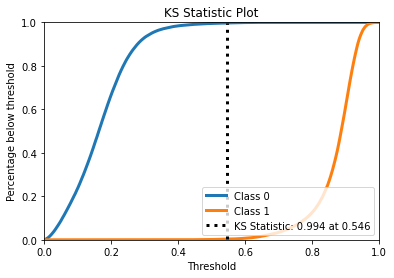

Performance no conjunto de teste:

Accuracy:         0.9968
Recall:           0.9986
Precision:        0.9951
F1:               0.9968
AUROC:            1.0000
AUPR:             1.0000


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:    9.7s finished


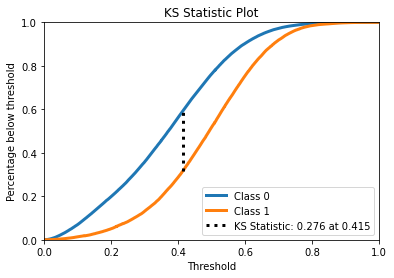

Performance no conjunto de validação:

Accuracy:         0.6225
Recall:           0.4825
Precision:        0.6701
F1:               0.5610
AUROC:            0.6883
AUPR:             0.6588
Trial  6  with parameters  {'n_estimators': 379, 'max_depth': 21, 'min_samples_leaf': 4, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 0.6043942698084023}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 379


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.6s remaining:    0.0s


building tree 2 of 379
building tree 3 of 379
building tree 4 of 379
building tree 5 of 379
building tree 6 of 379
building tree 7 of 379
building tree 8 of 379
building tree 9 of 379
building tree 10 of 379
building tree 11 of 379
building tree 12 of 379
building tree 13 of 379
building tree 14 of 379
building tree 15 of 379
building tree 16 of 379
building tree 17 of 379
building tree 18 of 379
building tree 19 of 379
building tree 20 of 379
building tree 21 of 379
building tree 22 of 379
building tree 23 of 379
building tree 24 of 379
building tree 25 of 379
building tree 26 of 379
building tree 27 of 379
building tree 28 of 379
building tree 29 of 379
building tree 30 of 379
building tree 31 of 379
building tree 32 of 379
building tree 33 of 379
building tree 34 of 379
building tree 35 of 379
building tree 36 of 379
building tree 37 of 379
building tree 38 of 379
building tree 39 of 379
building tree 40 of 379
building tree 41 of 379
building tree 42 of 379
building tree 43 of 379


building tree 334 of 379
building tree 335 of 379
building tree 336 of 379
building tree 337 of 379
building tree 338 of 379
building tree 339 of 379
building tree 340 of 379
building tree 341 of 379
building tree 342 of 379
building tree 343 of 379
building tree 344 of 379
building tree 345 of 379
building tree 346 of 379
building tree 347 of 379
building tree 348 of 379
building tree 349 of 379
building tree 350 of 379
building tree 351 of 379
building tree 352 of 379
building tree 353 of 379
building tree 354 of 379
building tree 355 of 379
building tree 356 of 379
building tree 357 of 379
building tree 358 of 379
building tree 359 of 379
building tree 360 of 379
building tree 361 of 379
building tree 362 of 379
building tree 363 of 379
building tree 364 of 379
building tree 365 of 379
building tree 366 of 379
building tree 367 of 379
building tree 368 of 379
building tree 369 of 379
building tree 370 of 379
building tree 371 of 379
building tree 372 of 379
building tree 373 of 379


[Parallel(n_jobs=1)]: Done 379 out of 379 | elapsed: 146.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 379 out of 379 | elapsed:   31.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 379 out of 379 | elapsed:   31.2s finished


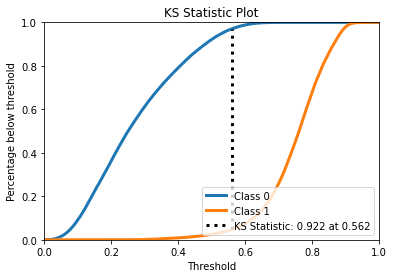

Performance no conjunto de teste:

Accuracy:         0.9481
Recall:           0.9749
Precision:        0.9252
F1:               0.9494
AUROC:            0.9930
AUPR:             0.9939


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 379 out of 379 | elapsed:   15.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 379 out of 379 | elapsed:   15.3s finished


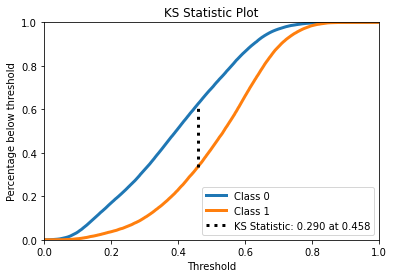

Performance no conjunto de validação:

Accuracy:         0.6387
Recall:           0.5801
Precision:        0.6571
F1:               0.6162
AUROC:            0.6998
AUPR:             0.6789
Trial  7  with parameters  {'n_estimators': 224, 'max_depth': 26, 'min_samples_leaf': 2, 'min_samples_split': 6, 'criterion': 'gini', 'max_features': 0.26028849248068947}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 224


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


building tree 2 of 224
building tree 3 of 224
building tree 4 of 224
building tree 5 of 224
building tree 6 of 224
building tree 7 of 224
building tree 8 of 224
building tree 9 of 224
building tree 10 of 224
building tree 11 of 224
building tree 12 of 224
building tree 13 of 224
building tree 14 of 224
building tree 15 of 224
building tree 16 of 224
building tree 17 of 224
building tree 18 of 224
building tree 19 of 224
building tree 20 of 224
building tree 21 of 224
building tree 22 of 224
building tree 23 of 224
building tree 24 of 224
building tree 25 of 224
building tree 26 of 224
building tree 27 of 224
building tree 28 of 224
building tree 29 of 224
building tree 30 of 224
building tree 31 of 224
building tree 32 of 224
building tree 33 of 224
building tree 34 of 224
building tree 35 of 224
building tree 36 of 224
building tree 37 of 224
building tree 38 of 224
building tree 39 of 224
building tree 40 of 224
building tree 41 of 224
building tree 42 of 224
building tree 43 of 224


[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed: 32.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:   21.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:   20.9s finished


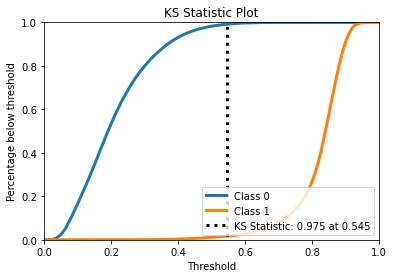

Performance no conjunto de teste:

Accuracy:         0.9856
Recall:           0.9887
Precision:        0.9826
F1:               0.9856
AUROC:            0.9991
AUPR:             0.9992


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:   10.6s finished


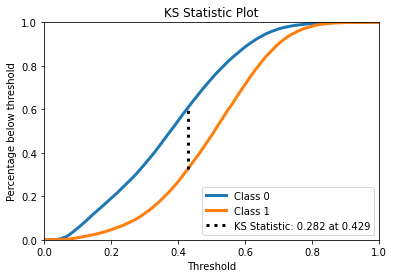

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6304
Recall:           0.5197
Precision:        0.6675
F1:               0.5844
AUROC:            0.6932
AUPR:             0.6665
Trial  8  with parameters  {'n_estimators': 201, 'max_depth': 16, 'min_samples_leaf': 7, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 0.35473538615303785}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed: 38.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   13.5s finished


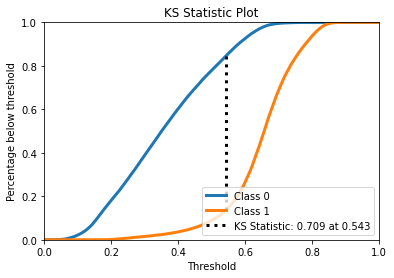

Performance no conjunto de teste:

Accuracy:         0.8450
Recall:           0.9110
Precision:        0.8048
F1:               0.8546
AUROC:            0.9284
AUPR:             0.9299


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    6.7s finished


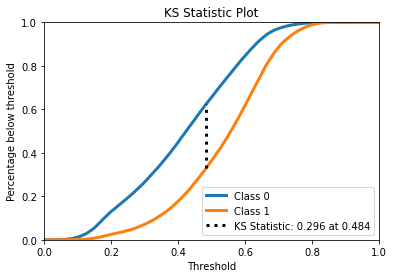

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6456
Recall:           0.6355
Precision:        0.6486
F1:               0.6420
AUROC:            0.7052
AUPR:             0.6867
Trial  9  with parameters  {'n_estimators': 201, 'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 0.3509584482442415}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed: 37.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   12.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   12.7s finished


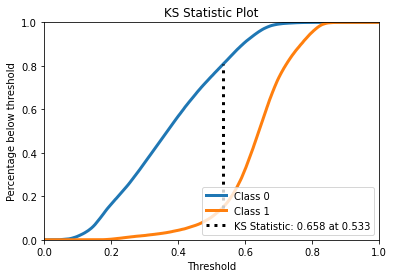

Performance no conjunto de teste:

Accuracy:         0.8238
Recall:           0.8954
Precision:        0.7833
F1:               0.8356
AUROC:            0.9024
AUPR:             0.8994


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    6.3s finished


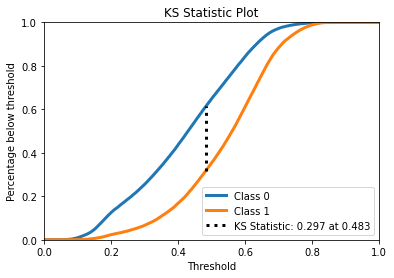

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6475
Recall:           0.6462
Precision:        0.6479
F1:               0.6470
AUROC:            0.7059
AUPR:             0.6879
Trial  10  with parameters  {'n_estimators': 201, 'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 0.37192498675499697}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed: 38.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   12.5s finished


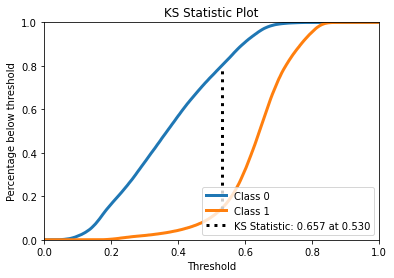

Performance no conjunto de teste:

Accuracy:         0.8235
Recall:           0.8945
Precision:        0.7833
F1:               0.8352
AUROC:            0.9030
AUPR:             0.9006


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    6.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    6.0s finished


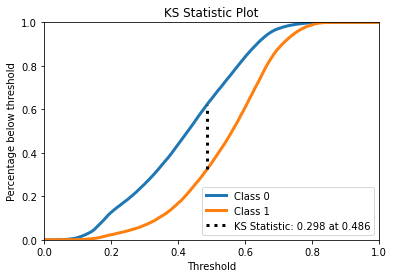

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6479
Recall:           0.6469
Precision:        0.6482
F1:               0.6476
AUROC:            0.7058
AUPR:             0.6878
Trial  11  with parameters  {'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 0.8}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 82.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.3s finished


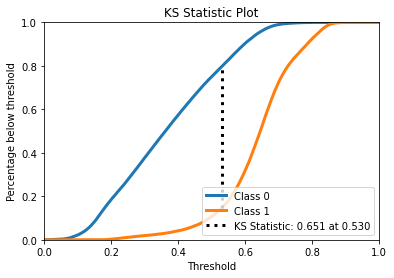

Performance no conjunto de teste:

Accuracy:         0.8216
Recall:           0.8933
Precision:        0.7812
F1:               0.8335
AUROC:            0.9019
AUPR:             0.8978


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.0s finished


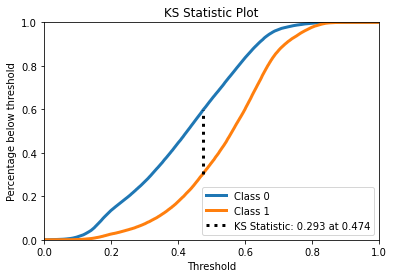

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6458
Recall:           0.6448
Precision:        0.6461
F1:               0.6455
AUROC:            0.7041
AUPR:             0.6864
Trial  12  with parameters  {'n_estimators': 202, 'max_depth': 14, 'min_samples_leaf': 7, 'min_samples_split': 7, 'criterion': 'entropy', 'max_features': 0.8}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 202


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.2s remaining:    0.0s


building tree 2 of 202
building tree 3 of 202
building tree 4 of 202
building tree 5 of 202
building tree 6 of 202
building tree 7 of 202
building tree 8 of 202
building tree 9 of 202
building tree 10 of 202
building tree 11 of 202
building tree 12 of 202
building tree 13 of 202
building tree 14 of 202
building tree 15 of 202
building tree 16 of 202
building tree 17 of 202
building tree 18 of 202
building tree 19 of 202
building tree 20 of 202
building tree 21 of 202
building tree 22 of 202
building tree 23 of 202
building tree 24 of 202
building tree 25 of 202
building tree 26 of 202
building tree 27 of 202
building tree 28 of 202
building tree 29 of 202
building tree 30 of 202
building tree 31 of 202
building tree 32 of 202
building tree 33 of 202
building tree 34 of 202
building tree 35 of 202
building tree 36 of 202
building tree 37 of 202
building tree 38 of 202
building tree 39 of 202
building tree 40 of 202
building tree 41 of 202
building tree 42 of 202
building tree 43 of 202


[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed: 78.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:   12.1s finished


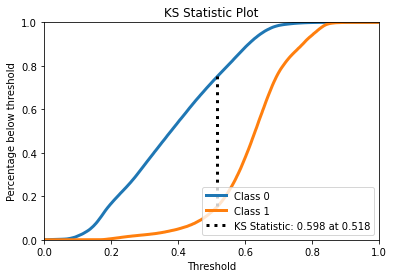

Performance no conjunto de teste:

Accuracy:         0.7975
Recall:           0.8719
Precision:        0.7590
F1:               0.8115
AUROC:            0.8722
AUPR:             0.8621


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:    5.9s finished


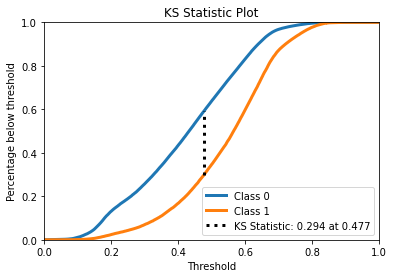

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6457
Recall:           0.6537
Precision:        0.6434
F1:               0.6485
AUROC:            0.7042
AUPR:             0.6867
Trial  13  with parameters  {'n_estimators': 202, 'max_depth': 13, 'min_samples_leaf': 7, 'min_samples_split': 10, 'criterion': 'entropy', 'max_features': 0.1}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 202


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 202
building tree 3 of 202
building tree 4 of 202
building tree 5 of 202
building tree 6 of 202
building tree 7 of 202
building tree 8 of 202
building tree 9 of 202
building tree 10 of 202
building tree 11 of 202
building tree 12 of 202
building tree 13 of 202
building tree 14 of 202
building tree 15 of 202
building tree 16 of 202
building tree 17 of 202
building tree 18 of 202
building tree 19 of 202
building tree 20 of 202
building tree 21 of 202
building tree 22 of 202
building tree 23 of 202
building tree 24 of 202
building tree 25 of 202
building tree 26 of 202
building tree 27 of 202
building tree 28 of 202
building tree 29 of 202
building tree 30 of 202
building tree 31 of 202
building tree 32 of 202
building tree 33 of 202
building tree 34 of 202
building tree 35 of 202
building tree 36 of 202
building tree 37 of 202
building tree 38 of 202
building tree 39 of 202
building tree 40 of 202
building tree 41 of 202
building tree 42 of 202
building tree 43 of 202


[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:  9.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:   11.1s finished


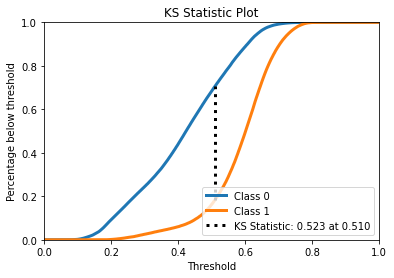

Performance no conjunto de teste:

Accuracy:         0.7606
Recall:           0.8376
Precision:        0.7258
F1:               0.7777
AUROC:            0.8294
AUPR:             0.8138


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:    5.5s finished


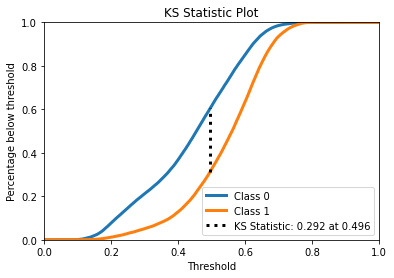

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6451
Recall:           0.6751
Precision:        0.6369
F1:               0.6555
AUROC:            0.7012
AUPR:             0.6810
Trial  14  with parameters  {'n_estimators': 201, 'max_depth': 14, 'min_samples_leaf': 8, 'min_samples_split': 8, 'criterion': 'gini', 'max_features': 0.1}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  7.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   12.2s finished


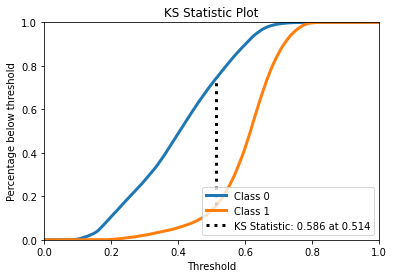

Performance no conjunto de teste:

Accuracy:         0.7899
Recall:           0.8639
Precision:        0.7526
F1:               0.8044
AUROC:            0.8623
AUPR:             0.8519


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:    5.9s finished


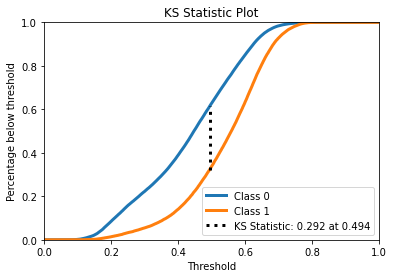

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6453
Recall:           0.6627
Precision:        0.6404
F1:               0.6513
AUROC:            0.7013
AUPR:             0.6813
Trial  15  with parameters  {'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 7, 'criterion': 'entropy', 'max_features': 0.1}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  9.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.4s finished


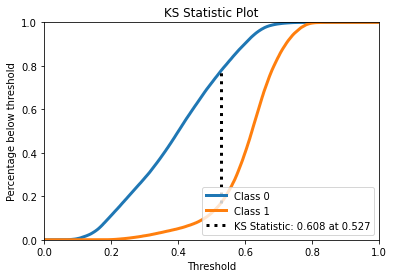

Performance no conjunto de teste:

Accuracy:         0.7993
Recall:           0.8768
Precision:        0.7591
F1:               0.8137
AUROC:            0.8743
AUPR:             0.8660


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.1s finished


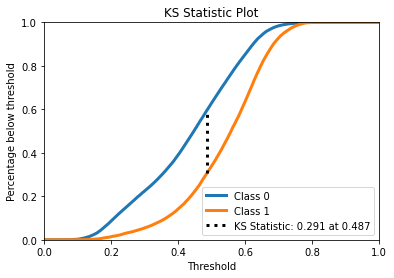

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6448
Recall:           0.6604
Precision:        0.6404
F1:               0.6503
AUROC:            0.7019
AUPR:             0.6821
Trial  16  with parameters  {'n_estimators': 194, 'max_depth': 13, 'min_samples_leaf': 10, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 0.1}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 194


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


building tree 2 of 194
building tree 3 of 194
building tree 4 of 194
building tree 5 of 194
building tree 6 of 194
building tree 7 of 194
building tree 8 of 194
building tree 9 of 194
building tree 10 of 194
building tree 11 of 194
building tree 12 of 194
building tree 13 of 194
building tree 14 of 194
building tree 15 of 194
building tree 16 of 194
building tree 17 of 194
building tree 18 of 194
building tree 19 of 194
building tree 20 of 194
building tree 21 of 194
building tree 22 of 194
building tree 23 of 194
building tree 24 of 194
building tree 25 of 194
building tree 26 of 194
building tree 27 of 194
building tree 28 of 194
building tree 29 of 194
building tree 30 of 194
building tree 31 of 194
building tree 32 of 194
building tree 33 of 194
building tree 34 of 194
building tree 35 of 194
building tree 36 of 194
building tree 37 of 194
building tree 38 of 194
building tree 39 of 194
building tree 40 of 194
building tree 41 of 194
building tree 42 of 194
building tree 43 of 194


[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed:  8.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed:   11.1s finished


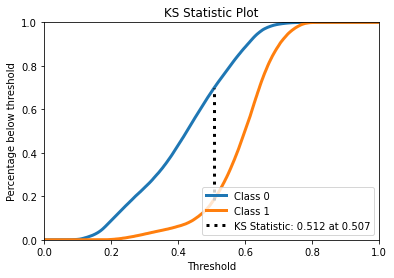

Performance no conjunto de teste:

Accuracy:         0.7560
Recall:           0.8306
Precision:        0.7228
F1:               0.7730
AUROC:            0.8234
AUPR:             0.8075


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed:    5.4s finished


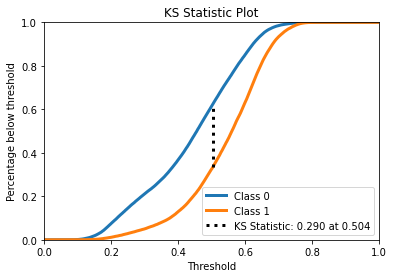

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6448
Recall:           0.6750
Precision:        0.6366
F1:               0.6552
AUROC:            0.7012
AUPR:             0.6817
Trial  17  with parameters  {'n_estimators': 193, 'max_depth': 13, 'min_samples_leaf': 8, 'min_samples_split': 10, 'criterion': 'entropy', 'max_features': 0.1}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 193


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


building tree 2 of 193
building tree 3 of 193
building tree 4 of 193
building tree 5 of 193
building tree 6 of 193
building tree 7 of 193
building tree 8 of 193
building tree 9 of 193
building tree 10 of 193
building tree 11 of 193
building tree 12 of 193
building tree 13 of 193
building tree 14 of 193
building tree 15 of 193
building tree 16 of 193
building tree 17 of 193
building tree 18 of 193
building tree 19 of 193
building tree 20 of 193
building tree 21 of 193
building tree 22 of 193
building tree 23 of 193
building tree 24 of 193
building tree 25 of 193
building tree 26 of 193
building tree 27 of 193
building tree 28 of 193
building tree 29 of 193
building tree 30 of 193
building tree 31 of 193
building tree 32 of 193
building tree 33 of 193
building tree 34 of 193
building tree 35 of 193
building tree 36 of 193
building tree 37 of 193
building tree 38 of 193
building tree 39 of 193
building tree 40 of 193
building tree 41 of 193
building tree 42 of 193
building tree 43 of 193


[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:  8.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:   10.9s finished


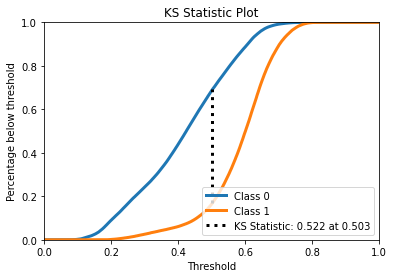

Performance no conjunto de teste:

Accuracy:         0.7609
Recall:           0.8360
Precision:        0.7269
F1:               0.7776
AUROC:            0.8275
AUPR:             0.8113


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:    5.4s finished


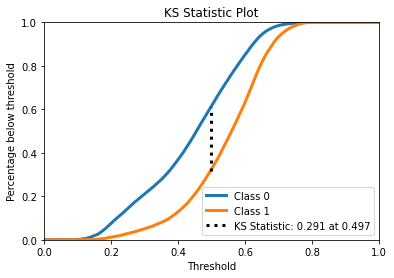

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6450
Recall:           0.6737
Precision:        0.6371
F1:               0.6549
AUROC:            0.7011
AUPR:             0.6814
Trial  18  with parameters  {'n_estimators': 197, 'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 6, 'criterion': 'entropy', 'max_features': 0.1}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 197


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


building tree 2 of 197
building tree 3 of 197
building tree 4 of 197
building tree 5 of 197
building tree 6 of 197
building tree 7 of 197
building tree 8 of 197
building tree 9 of 197
building tree 10 of 197
building tree 11 of 197
building tree 12 of 197
building tree 13 of 197
building tree 14 of 197
building tree 15 of 197
building tree 16 of 197
building tree 17 of 197
building tree 18 of 197
building tree 19 of 197
building tree 20 of 197
building tree 21 of 197
building tree 22 of 197
building tree 23 of 197
building tree 24 of 197
building tree 25 of 197
building tree 26 of 197
building tree 27 of 197
building tree 28 of 197
building tree 29 of 197
building tree 30 of 197
building tree 31 of 197
building tree 32 of 197
building tree 33 of 197
building tree 34 of 197
building tree 35 of 197
building tree 36 of 197
building tree 37 of 197
building tree 38 of 197
building tree 39 of 197
building tree 40 of 197
building tree 41 of 197
building tree 42 of 197
building tree 43 of 197


[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:  8.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:   10.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:   10.2s finished


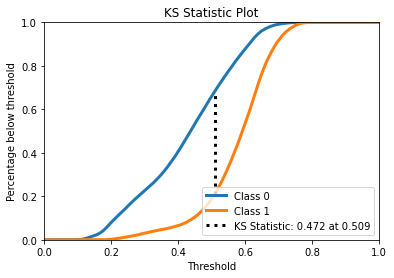

Performance no conjunto de teste:

Accuracy:         0.7356
Recall:           0.8116
Precision:        0.7045
F1:               0.7543
AUROC:            0.8004
AUPR:             0.7804


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:    5.0s finished


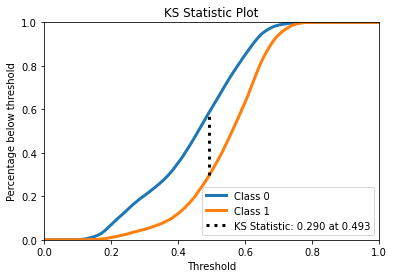

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6451
Recall:           0.6854
Precision:        0.6343
F1:               0.6589
AUROC:            0.7006
AUPR:             0.6807
Trial  19  with parameters  {'n_estimators': 499, 'max_depth': 74, 'min_samples_leaf': 7, 'min_samples_split': 9, 'criterion': 'gini', 'max_features': 0.1886148459177624}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 499


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


building tree 2 of 499
building tree 3 of 499
building tree 4 of 499
building tree 5 of 499
building tree 6 of 499
building tree 7 of 499
building tree 8 of 499
building tree 9 of 499
building tree 10 of 499
building tree 11 of 499
building tree 12 of 499
building tree 13 of 499
building tree 14 of 499
building tree 15 of 499
building tree 16 of 499
building tree 17 of 499
building tree 18 of 499
building tree 19 of 499
building tree 20 of 499
building tree 21 of 499
building tree 22 of 499
building tree 23 of 499
building tree 24 of 499
building tree 25 of 499
building tree 26 of 499
building tree 27 of 499
building tree 28 of 499
building tree 29 of 499
building tree 30 of 499
building tree 31 of 499
building tree 32 of 499
building tree 33 of 499
building tree 34 of 499
building tree 35 of 499
building tree 36 of 499
building tree 37 of 499
building tree 38 of 499
building tree 39 of 499
building tree 40 of 499
building tree 41 of 499
building tree 42 of 499
building tree 43 of 499


building tree 334 of 499
building tree 335 of 499
building tree 336 of 499
building tree 337 of 499
building tree 338 of 499
building tree 339 of 499
building tree 340 of 499
building tree 341 of 499
building tree 342 of 499
building tree 343 of 499
building tree 344 of 499
building tree 345 of 499
building tree 346 of 499
building tree 347 of 499
building tree 348 of 499
building tree 349 of 499
building tree 350 of 499
building tree 351 of 499
building tree 352 of 499
building tree 353 of 499
building tree 354 of 499
building tree 355 of 499
building tree 356 of 499
building tree 357 of 499
building tree 358 of 499
building tree 359 of 499
building tree 360 of 499
building tree 361 of 499
building tree 362 of 499
building tree 363 of 499
building tree 364 of 499
building tree 365 of 499
building tree 366 of 499
building tree 367 of 499
building tree 368 of 499
building tree 369 of 499
building tree 370 of 499
building tree 371 of 499
building tree 372 of 499
building tree 373 of 499


[Parallel(n_jobs=1)]: Done 499 out of 499 | elapsed: 50.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 499 out of 499 | elapsed:   46.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 499 out of 499 | elapsed:   47.3s finished


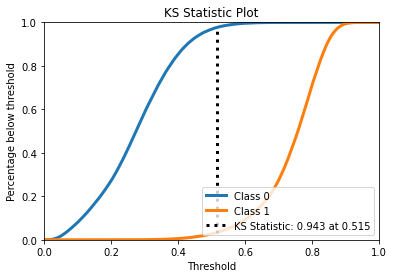

Performance no conjunto de teste:

Accuracy:         0.9707
Recall:           0.9729
Precision:        0.9687
F1:               0.9708
AUROC:            0.9960
AUPR:             0.9964


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 499 out of 499 | elapsed:   22.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 499 out of 499 | elapsed:   22.4s finished


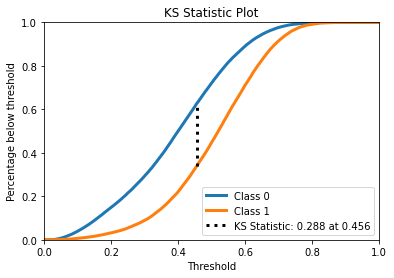

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Performance no conjunto de validação:

Accuracy:         0.6364
Recall:           0.5522
Precision:        0.6640
F1:               0.6030
AUROC:            0.6977
AUPR:             0.6735
Trial  20  with parameters  {'n_estimators': 278, 'max_depth': 75, 'min_samples_leaf': 10, 'min_samples_split': 10, 'criterion': 'gini', 'max_features': 0.31708302453247694}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 278


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


building tree 2 of 278
building tree 3 of 278
building tree 4 of 278
building tree 5 of 278
building tree 6 of 278
building tree 7 of 278
building tree 8 of 278
building tree 9 of 278
building tree 10 of 278
building tree 11 of 278
building tree 12 of 278
building tree 13 of 278
building tree 14 of 278
building tree 15 of 278
building tree 16 of 278
building tree 17 of 278
building tree 18 of 278
building tree 19 of 278
building tree 20 of 278
building tree 21 of 278
building tree 22 of 278
building tree 23 of 278
building tree 24 of 278
building tree 25 of 278
building tree 26 of 278
building tree 27 of 278
building tree 28 of 278
building tree 29 of 278
building tree 30 of 278
building tree 31 of 278
building tree 32 of 278
building tree 33 of 278
building tree 34 of 278
building tree 35 of 278
building tree 36 of 278
building tree 37 of 278
building tree 38 of 278
building tree 39 of 278
building tree 40 of 278
building tree 41 of 278
building tree 42 of 278
building tree 43 of 278


[Parallel(n_jobs=1)]: Done 278 out of 278 | elapsed: 48.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 278 out of 278 | elapsed:   28.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 278 out of 278 | elapsed:   28.1s finished


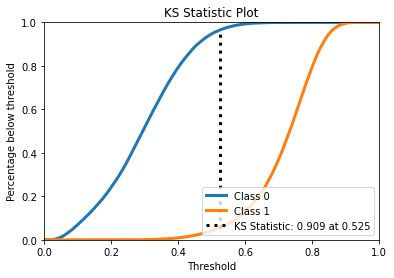

Performance no conjunto de teste:

Accuracy:         0.9527
Recall:           0.9587
Precision:        0.9474
F1:               0.9530
AUROC:            0.9912
AUPR:             0.9921


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 278 out of 278 | elapsed:   14.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 278 out of 278 | elapsed:   14.2s finished


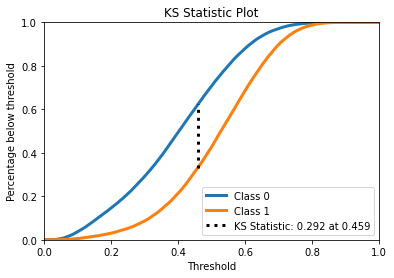

Performance no conjunto de validação:

Accuracy:         0.6401
Recall:           0.5728
Precision:        0.6619
F1:               0.6141
AUROC:            0.7002
AUPR:             0.6779
{'Trial-ID': 10, 'Iteration': 1, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 0.37192498675499697, 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 201, 'Objective': 0.6479419835358683}


In [22]:
# without cross validation
study = sherpa.Study(parameters=parameters,
                     algorithm=algorithm,
                     disable_dashboard=True,
                     lower_is_better=False)

for trial in study:
    print("Trial ", trial.id, " with parameters ", trial.parameters)
    rf_clf = RandomForestClassifier(criterion=trial.parameters['criterion'],
                                 max_depth=trial.parameters['max_depth'],
                                 min_samples_leaf=trial.parameters['min_samples_leaf'],
                                 min_samples_split=trial.parameters['min_samples_split'],
                                 max_features=trial.parameters['max_features'],
                                 n_estimators=trial.parameters['n_estimators'],
                                 verbose=2,
                                 random_state=0)
    rf_clf.fit(train_X, train_Y)
    rf_pred_class = rf_clf.predict(train_X)
    rf_pred_scores = rf_clf.predict_proba(train_X)
    accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(train_Y, rf_pred_class, rf_pred_scores)
    print('Performance no conjunto de teste:')
    print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

    rf_pred_class = rf_clf.predict(validation_X)
    rf_pred_scores = rf_clf.predict_proba(validation_X)
    accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(validation_Y, rf_pred_class, rf_pred_scores)
    print('Performance no conjunto de validação:')
    print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)
    study.add_observation(trial,
                          iteration=1,
                          objective=accuracy)
    study.finalize(trial)
print(study.get_best_result())

In [23]:
print(study.get_best_result())

{'Trial-ID': 10, 'Iteration': 1, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 0.37192498675499697, 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 201, 'Objective': 0.6479419835358683}
